In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("Data_VPN_NONVPN.csv")
data.head()

,total_fpackets,total_fvolume,max_fpktl,max_bpktl,duration,fpsh_cnt,total_fhlen,label
0,10,3276,2042,2565,562036,4,212,0
1,30,10045,1653,6147,298982,10,624,0
2,12,1319,571,2102,794699,2,300,0
3,11,1264,571,4150,898853,2,232,0
4,19,11660,4551,6246,572270,8,392,0


In [ ]:
print(data['label'].unique())


[0 1]


In [ ]:
data.shape

(2249, 8)

In [ ]:
data.describe(include = 'all')

,total_fpackets,total_fvolume,max_fpktl,max_bpktl,duration,fpsh_cnt,total_fhlen,label
count,2249.000000,2.249000e+03,2249.000000,2249.000000,2249.000000,2249.000000,2249.00000,2249.000000
mean,55.440196,2.156024e+04,1427.904847,3777.965763,459204.196976,20.095598,1174.29791,0.224544
std,400.623584,1.287218e+05,2294.279122,4945.962336,278004.570085,205.633247,8381.28219,0.417375
min,1.000000,6.600000e+01,66.000000,0.000000,0.000000,0.000000,32.00000,0.000000
25%,8.000000,1.183000e+03,571.000000,1466.000000,231150.000000,2.000000,172.00000,0.000000
50%,11.000000,1.915000e+03,626.000000,2878.000000,428770.000000,4.000000,244.00000,0.000000
75%,20.000000,4.058000e+03,1332.000000,4290.000000,681169.000000,6.000000,424.00000,0.000000
max,14917.000000,2.976688e+06,25470.000000,57946.000000,999891.000000,8613.000000,304668.00000,1.000000


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
print(X)

      total_fpackets  total_fvolume  max_fpktl  ...  duration  fpsh_cnt  total_fhlen
0                 10           3276       2042  ...    562036         4          212
1                 30          10045       1653  ...    298982        10          624
2                 12           1319        571  ...    794699         2          300
3                 11           1264        571  ...    898853         2          232
4                 19          11660       4551  ...    572270         8          392
...              ...            ...        ...  ...       ...       ...          ...
2244              12           1371        269  ...     54007         5          252
2245               8           1378        621  ...    331548         3          172
2246               7           1285        586  ...    510543         3          152
2247               8           1345        586  ...    385569         3          172
2248               5            454        208  ...    280100    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
print(X_trainscaled)

[[-0.08597839 -0.10758587 -0.34053539 ... -0.79164491 -0.04520618
  -0.08892346]
 [-0.10517791 -0.16424415 -0.3340113  ... -0.72363312 -0.12480368
  -0.10660624]
 [-0.12437742 -0.16856952 -0.37750522 ... -0.80966004 -0.12480368
  -0.12428903]
 ...
 [-0.17813606 -0.18383074 -0.37750522 ...  1.04945539 -0.17028797
  -0.17380082]
 [-0.17045626 -0.1820149  -0.37750522 ... -1.50163516 -0.1589169
  -0.16672771]
 [-0.16277645 -0.15897005  0.27881803 ...  0.41881765 -0.13617476
  -0.15965459]]


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(60),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.7977777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,y_pred)

array([[341,   3],
       [ 88,  18]])

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.99      0.88       344
           1       0.86      0.17      0.28       106

    accuracy                           0.80       450
   macro avg       0.83      0.58      0.58       450
weighted avg       0.81      0.80      0.74       450



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


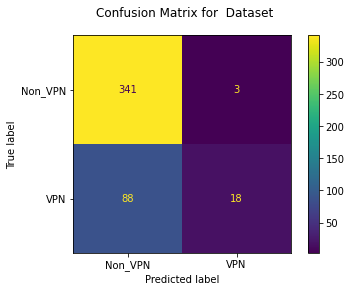

In [ ]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Non_VPN","VPN"])
fig.figure_.suptitle("Confusion Matrix for  Dataset")
plt.show()